# Homework 3

## Pair Programming Group Number: 37
## Members of Team: Greg Mika, Chase Khan

## Feature engineering and linear regression

For this week's homework we are going to load in a data set that isn't in the "cleanest", repair it, add a feature, do some analysis on the features, build a linear regression model, and use that model to estimate numeric values.  Is linear regression _really_ machine learning? Depends on who you ask, but it is definitely an important tool for data analytics. 

In [1]:
# only use these libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load in the melb_data_sold_train.csv file here
df = pd.read_csv('melb_data_sold_train.csv')

## Q1 Fix the dataframe to remove any blanks
The linear regression needs all attribute and dependent values to be defined.  Use list-wise deletion to remove entries with missing values. Save the modified dataframe with the indices reset to be $0-(length-1)$ into the variable `df1` for use in a later problem. 

In [2]:
df1 = df.dropna().reset_index(drop = True)

In [3]:
df1

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,h,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan
3906,Greensborough,12 Yangoora Pl,4,h,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan
3907,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan
3908,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan


## Q2 Add a new feature
Toorak is known as one of the priciest suburbs in Melbourne.  Create a new column in your dataframe that is the distance in kilometers from the center of Toorak to the latitude/longitude of that row.  Use the latitude / longitude of $(-37.841820, 145.015986)$ for the center of Toorak.  You may assume the Earth is spherical and has radius of $6371.0088$km (check your function ... the property located at $(-37.68178,144.73779)$ is approx 30.2 km away)

In [4]:
# Step 1 : Define the Haversine distance as a function
# assumes that pt1 and pt2 are 2x1 [lat,long] np arrays that contain locations of the 2 earth coordinates in deg
# using the Haversine formula found https://en.wikipedia.org/wiki/Haversine_formula
def haversine_distance(pt1,pt2):
    r = 6371.0088
    lat1 = pt1[0] * np.pi / 180
    lat2 = pt2[0] * np.pi / 180
    long1 = pt1[1] * np.pi / 180
    long2 = pt2[1] * np.pi / 180
    
    d = 2 * r * np.arcsin(np.sqrt(((np.sin((lat2 - lat1)/2))**2) + np.cos(lat1)*np.cos(lat2)*(np.sin((long2-long1)/2))**2))
    
    return d
    #code here, make sure pt1 and pt2 are passed in as degrees (lat,long) and convert to radians before calculation

In [5]:
# A quick check to see if we are getting the expected value
toorak_pt = np.array([-37.841820, 145.015986])
haversine_distance(toorak_pt,[-37.68178,144.73779])

30.24477251357316

In [6]:
# Step 2 : Add a new column to `df1` called 'distance_to_toorak' that uses the haversine_distance function 
# to calculate the distance to Toorak for every row in our dataframe. Save the new dataframe as `df2`
distance_to_toorak = []
for idx,row in df1.iterrows():
    point = np.array([df1['Lattitude'][idx], df1['Longtitude'][idx]])
    distance_to_toorak.append(haversine_distance(toorak_pt, point))

df2 = df1.copy()
df2['distance_to_toorak'] = distance_to_toorak
df2

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.261612
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.621843
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.374206
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.780655
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.152012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,h,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,16.998846
3906,Greensborough,12 Yangoora Pl,4,h,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,18.491623
3907,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,11.798784
3908,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,11.986684


## Q3 Create a one hot encoding for the categorical column 'Type'
Modify the data frame `df2` such that it removes the column for `Type` and replaces it with the appropriate number of columns for a one-hot encoding of the column `Type` and save that dataframe as `df3` for use in a later problem. The pandas method [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) will be very useful here. 

In [7]:
type_col = pd.get_dummies(df2['Type'])
df3 = df2.drop(columns = ['Type'])
df3.insert(3, 'h', type_col['h'])
df3.insert(4, 't', type_col['t'])
df3.insert(5, 'u', type_col['u'])
df3

,Suburb,Address,Rooms,h,t,u,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Abbotsford,25 Bloomburg St,2,1,0,0,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.261612
1,Abbotsford,124 Yarra St,3,1,0,0,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.621843
2,Abbotsford,98 Charles St,2,1,0,0,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.374206
3,Abbotsford,10 Valiant St,2,1,0,0,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.780655
4,Abbotsford,123/56 Nicholson St,2,0,0,1,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.152012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,1,0,0,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,16.998846
3906,Greensborough,12 Yangoora Pl,4,1,0,0,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,18.491623
3907,Highett,1/12 Jillian Av,3,0,1,0,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,11.798784
3908,Highett,31 The Crescent,4,0,1,0,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,11.986684


## Q4 Calculate the pairwise correlations between all of your numeric attributes
Use the Pearson correlation as discussed in the lectures to calculate the pairwise correlations between the attributes in the dataframe `df3`. Read the documentation for [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

In [8]:
df3.corr(method = 'pearson')

,Rooms,h,t,u,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak
Rooms,1.000000,0.501128,-0.040762,-0.535102,0.502814,0.054676,0.941684,0.593847,0.401716,0.085676,0.547816,-0.030447,0.012858,0.074846,0.232844
h,0.501128,1.000000,-0.484749,-0.778062,0.391761,-0.040504,0.484612,0.181773,0.214175,0.047422,0.306231,-0.402670,0.121254,-0.040387,0.221104
t,-0.040762,-0.484749,1.000000,-0.172282,-0.095295,-0.008546,-0.037366,0.108148,-0.006836,-0.067257,-0.032396,0.331105,-0.028636,0.023603,-0.014192
u,-0.535102,-0.778062,-0.172282,1.000000,-0.372766,0.051754,-0.518941,-0.282390,-0.236298,-0.005103,-0.321614,0.215689,-0.115991,0.028533,-0.238818
Price,0.502814,0.391761,-0.095295,-0.372766,1.000000,0.136468,0.480115,0.462985,0.223552,0.064029,0.465598,-0.330560,-0.224400,0.184597,-0.357013
Postcode,0.054676,-0.040504,-0.008546,0.051754,0.136468,1.000000,0.059311,0.122046,0.034698,0.014276,0.089355,0.035561,-0.445625,0.471934,0.008062
Bedroom2,0.941684,0.484612,-0.037366,-0.518941,0.480115,0.059311,1.000000,0.594920,0.403840,0.083237,0.532910,-0.010031,0.019970,0.076236,0.241515
Bathroom,0.593847,0.181773,0.108148,-0.282390,0.462985,0.122046,0.594920,1.000000,0.322266,0.059483,0.470554,0.192470,-0.068643,0.109313,0.051662
Car,0.401716,0.214175,-0.006836,-0.236298,0.223552,0.034698,0.403840,0.322266,1.000000,0.100686,0.299613,0.153313,-0.007839,0.032915,0.214759
Landsize,0.085676,0.047422,-0.067257,-0.005103,0.064029,0.014276,0.083237,0.059483,0.100686,1.000000,0.063136,0.028638,0.010734,0.013979,0.041420


## Q5 Create a linear regression model to predict home values
Using the math in ESLII, section 3.2 equation (3.6) calculate $\hat{\beta}$

We are going to create a linear regression model using our numeric attribute columns in `df3`, and specifying the home values (`Price` column) as the value we are trying to predict.  You may use numpy to do matrix calculations, but you may not use a built in regression library (for example, you may not use scikt-learn). 

The features you use to build the matrix $X$ should all be numeric and include the distance to Toorak and the one hot encodings. 

In [9]:
# Step one, build the matrix X
#In the context of this problem, we decided to omit postal code and year built because their values do not work well for a regression
length = len(df3['Rooms'])
col_names = ['Rooms', 'h', 't', 'u', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Lattitude', 'Longtitude', 'distance_to_toorak']
X = []
for i in range(length):
    row = []
    row.append(1)
    for name in col_names:
        row.append(df3[name][i])
    X.append(row)
X = pd.DataFrame(np.array(X))

In [10]:
# Step two, build the column vector y
y = []
for i in range(length):
    row = [df3['Price'][i]]
    y.append(row)
    
y = (np.array(y))

In [11]:
# Step three, find beta hat per the formula (3.6) (you should use the library we used in class)
[beta_hat, residuals, rank, s] = np.linalg.lstsq(X, y, rcond = -1)

In [12]:
# Test the model to see if we get something "reasonable" - i picked 23 at random 
np.matmul(X.iloc[23],beta_hat) 

array([665154.86206582])

In [13]:
# This is the actual price at this point
y[23]

array([805000.])

## Q6 Apply the linear regression model to the test data and visualize the error
We will cover other methods of evaluating any sort of prediction later, but for this week's exercise I have partitioned the data into two files.  Load the melb_data_sold_test.csv data set and use the $\hat{\beta}$ you calculated in the last step to predict the housing prices for data in melb_data_sold_test.  Create a visualization that shows the absolute error in your predictions. Remember to do all your data pre-processing on the data loaded from the melb_data_sold_test file before you apply beta_hat.  For the visualization, a histogram of the absolute error vs the total housing prices is sufficient.  Use [hist](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) for reference. 

While doing imputation, there are some helpful parameters in [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). 

In [14]:
# Step zero, load the melb_data_sold_test.csv data for testing.  Use Imputation to fill in any missing numeric values
# We use imputation here instead of deletion since we want a prediction for _every_ row in the test file.

#Use imputation on all of the numerical values, fill in missing values with the mean
df4 = pd.read_csv('melb_data_sold_train.csv')
col_names = ['Rooms', 'Type', 'Price', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']
for name in col_names:
    if name == 'Type':
        df4[name].fillna(value=df4[name].mode(), inplace=True)
    else:
        df4[name].fillna(value=df4[name].mean(), inplace=True)

In [15]:
# Step one, add the new attribute for the 'distance_to_toorak' and the one hot encoding to the new data frame
distance_to_toorak = []
for idx,row in df4.iterrows():
    point = np.array([df4['Lattitude'][idx], df4['Longtitude'][idx]])
    distance_to_toorak.append(haversine_distance(toorak_pt, point))

df4['distance_to_toorak'] = distance_to_toorak
type_col = pd.get_dummies(df4['Type'])
df4.drop(columns = ['Type'])
df4.insert(3, 'h', type_col['h'])
df4.insert(4, 't', type_col['t'])
df4.insert(5, 'u', type_col['u'])
df4

,Suburb,Address,Rooms,h,t,u,Type,Price,Date,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Abbotsford,85 Turner St,2,1,0,0,h,1480000.0,3/12/2016,3067.0,...,1.0,1.0,202.0,144.881713,1962.73913,Yarra,-37.79960,144.99840,Northern Metropolitan,4.942255
1,Abbotsford,25 Bloomburg St,2,1,0,0,h,1035000.0,4/02/2016,3067.0,...,1.0,0.0,156.0,79.000000,1900.00000,Yarra,-37.80790,144.99340,Northern Metropolitan,4.261612
2,Abbotsford,129 Charles St,2,1,0,0,h,941000.0,7/05/2016,3067.0,...,1.0,0.0,181.0,144.881713,1962.73913,Yarra,-37.80410,144.99530,Northern Metropolitan,4.570911
3,Abbotsford,124 Yarra St,3,1,0,0,h,1876000.0,7/05/2016,3067.0,...,2.0,0.0,245.0,210.000000,1910.00000,Yarra,-37.80240,144.99930,Northern Metropolitan,4.621843
4,Abbotsford,98 Charles St,2,1,0,0,h,1636000.0,8/10/2016,3067.0,...,1.0,2.0,256.0,107.000000,1890.00000,Yarra,-37.80600,144.99540,Northern Metropolitan,4.374206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,Highett,1/12 Jillian Av,3,0,1,0,t,1200000.0,29/07/2017,3190.0,...,1.0,2.0,269.0,125.000000,2000.00000,Bayside,-37.94775,145.02379,Southern Metropolitan,11.798784
7996,Highett,23 The Crescent,3,1,0,0,h,1260000.0,29/07/2017,3190.0,...,1.0,0.0,642.0,144.881713,1962.73913,Kingston,-37.94691,145.04935,Southern Metropolitan,12.046654
7997,Highett,31 The Crescent,4,0,1,0,t,1200000.0,29/07/2017,3190.0,...,2.0,2.0,304.0,183.000000,2007.00000,Kingston,-37.94633,145.04947,Southern Metropolitan,11.986684
7998,Hillside,1/14 Jade Wy,3,0,0,1,u,485000.0,29/07/2017,3037.0,...,2.0,2.0,345.0,144.881713,2005.00000,Melton,-37.70428,144.74705,Western Metropolitan,28.153847


In [16]:
# Step two, build the attribute matrix Xdot 
length = len(df4['Rooms'])
col_names = ['Rooms', 'h', 't', 'u', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Lattitude', 'Longtitude', 'distance_to_toorak']
Xdot = []
for i in range(length):
    row = []
    row.append(1)
    for name in col_names:
        row.append(df4[name][i])
    Xdot.append(row)
Xdot = pd.DataFrame(np.array(Xdot))

In [17]:
# Step three, multiply Xdot by Beta hat. DO NOT USE A LOOP.  This is a vector of predicted prices
# called y_hat in the notes
y_hat = Xdot.dot(beta_hat)

In [18]:
# Step four, calculate the error vector, |actual price - predicted price|. We call this our "absolute error"
abs_err = []
for i in range(length):
    abs_err.append(abs(df4['Price'][i] - y_hat[0][i]))

Text(0.5, 1.0, 'Actual Price Compared to Absolute Error')

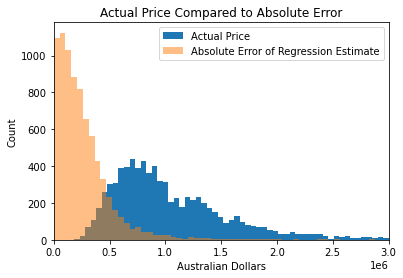

In [19]:
# Step five, create a histogram of the absolute error, and on the same plot create a histogram of the actual price.  
# You should use the "alpha" parameter to make the graph on top slightly translucent 
plt.hist(df4['Price'], bins = 151, label = 'Actual Price')
plt.hist(abs_err, alpha = 0.5, bins = 151, label = 'Absolute Error of Regression Estimate')
plt.xlim([0, 3e6])
plt.legend()
plt.xlabel('Australian Dollars')
plt.ylabel('Count')
plt.title('Actual Price Compared to Absolute Error')